In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sma
import statsmodels.formula.api as smf
import sklearn.linear_model as lm
from sklearn.metrics import (confusion_matrix, accuracy_score)
# set up path to import my python scripts
import sys
import os
src_path = os.path.abspath(os.path.join('..'))
if src_path not in sys.path:
    sys.path.append(src_path+"/src")
    
%load_ext autoreload
%autoreload 2
import clean_df

#import data from 2013-2014 NHANES: https://www.kaggle.com/cdc/national-health-and-nutrition-examination-survey
#description of columns: https://wwwn.cdc.gov/nchs/nhanes/2013-2014/demo_h.htm
demo_df = pd.read_csv('../data/demographic.csv')
diet_df = pd.read_csv('../data/diet.csv')
exam_df = pd.read_csv('../data/examination.csv')
labs_df = pd.read_csv('../data/labs.csv')
med_df = pd.read_csv('../data/medications.csv', encoding='latin1')
ques_df = pd.read_csv('../data/questionnaire.csv')

### Step 1: EDA

In [2]:
new_demo_df = demo_df[['SEQN','RIAGENDR','RIDAGEYR','RIDRETH3',
'DMQMILIZ','DMQADFC','DMDBORN4','DMDMARTL']]

In [3]:
'''
demo_df feature descriptions:
------------------------------
SEQN: Participant sequence number
RIAGENDR: Particpant gender
	1 -> Male
	2 -> Female
RIDAGEYR: Age in years
RIDRETH3: Race/Hispanic origin w/ NH Asian
	1 -> Mexican American
	2 -> Other Hispanic
	3 -> Non-Hispanic White
	4 -> Non-Hispanic Black
	6 -> Non-Hispanic Asian
	7 -> Other Race - Including Multi-Racial
DMQMILIZ: Served active duty in US Armed Forces
	1 -> Yes
	2 -> No
	7 -> Refused
	9 -> Don't Know
	. -> Missing
DMQADFC: Served in a foreign country
	1 -> Yes
	2 -> No
	7 -> Refused
	9 -> Don't Know
	. -> Missing
DMDBORN4: Country of birth
	1 -> Born in US
	2 -> Others
	77 -> Refused
	99 -> Don't Know
	. -> Missing
DMDMARTL: Marital Status
	1 -> Married
	2 -> Widowed
	3 -> Divorced
	4 -> Separated
	5 -> Never married
	6 -> Living with partner
	77 -> Refused
	99 -> Don't Know
	. -> Missing
'''

"\ndemo_df feature descriptions:\n------------------------------\nSEQN: Participant sequence number\nRIAGENDR: Particpant gender\n\t1 -> Male\n\t2 -> Female\nRIDAGEYR: Age in years\nRIDRETH3: Race/Hispanic origin w/ NH Asian\n\t1 -> Mexican American\n\t2 -> Other Hispanic\n\t3 -> Non-Hispanic White\n\t4 -> Non-Hispanic Black\n\t6 -> Non-Hispanic Asian\n\t7 -> Other Race - Including Multi-Racial\nDMQMILIZ: Served active duty in US Armed Forces\n\t1 -> Yes\n\t2 -> No\n\t7 -> Refused\n\t9 -> Don't Know\n\t. -> Missing\nDMQADFC: Served in a foreign country\n\t1 -> Yes\n\t2 -> No\n\t7 -> Refused\n\t9 -> Don't Know\n\t. -> Missing\nDMDBORN4: Country of birth\n\t1 -> Born in US\n\t2 -> Others\n\t77 -> Refused\n\t99 -> Don't Know\n\t. -> Missing\nDMDMARTL: Marital Status\n\t1 -> Married\n\t2 -> Widowed\n\t3 -> Divorced\n\t4 -> Separated\n\t5 -> Never married\n\t6 -> Living with partner\n\t77 -> Refused\n\t99 -> Don't Know\n\t. -> Missing\n"

In [4]:
new_df = clean_df.DemographicDF()
exam_df = clean_df.ExamDF()
new_df.left_merge(exam_df)
labs_df = clean_df.LabsDF()
new_df.left_merge(labs_df)
ques_df = clean_df.QuestDF()
new_df.left_merge(ques_df)

In [5]:
new_df.df.head()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,DMQMILIZ,DMQADFC,DMDBORN4,DMDMARTL,AVG_SYS_BP,AVG_DIAS_BP,High_SYS_BP,High_DIAS_BP,LBXHCT,LBXTR,BPQ020,BPQ080,BPQ040A,BPQ050A,BPQ090D
0,73557,Male,69,Black,Yes,Yes,Born in US,Separated,112.666667,74.000000,0.0,0.0,45.4,NaN,Yes,Yes,Yes,No,Yes
1,73558,Male,54,White,No,NaN,Born in US,Married,157.333333,61.333333,1.0,0.0,36.7,NaN,Yes,Yes,No,NaN,Yes
2,73559,Male,72,White,Yes,Yes,Born in US,Married,142.000000,82.000000,1.0,1.0,49.9,51.0,Yes,Yes,Yes,Yes,Yes
3,73560,Male,9,White,NaN,NaN,Born in US,NaN,104.666667,36.666667,0.0,0.0,37.8,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,Female,73,White,No,NaN,Born in US,Married,137.333333,86.666667,1.0,1.0,43.8,75.0,Yes,No,Yes,Yes,No


In [6]:
test_df = new_df.df
nicotine = test_df['LBXHCT']
avg_sys_bp = test_df['AVG_SYS_BP']

In [7]:
test_df.loc[test_df['RIDAGEYR'] > -1, ['SEQN']]

,SEQN
0,73557
1,73558
2,73559
3,73560
4,73561
...,...
10170,83727
10171,83728
10172,83729
10173,83730


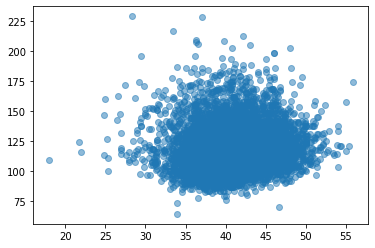

In [8]:
#AVG Systolic BP vs Nicotine (Hydroxycotinine, Serum (ng/mL))
fig, ax = plt.subplots()

# x = test_df['LBXHCT']
# y = test_df['AVG SYS BP']

ax = plt.scatter(x=nicotine,y=avg_sys_bp,alpha=0.5)

plt.show()

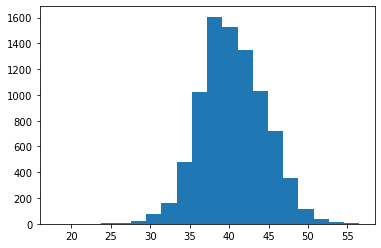

In [9]:
fig, ax = plt.subplots()

ax = plt.hist(x=nicotine,bins=20)

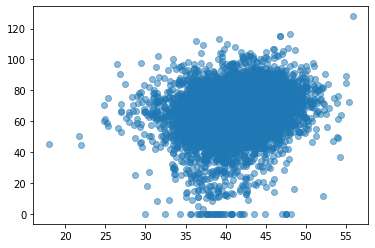

In [10]:
#AVG Diastolic BP vs Nicotine (Hydroxycotinine, Serum (ng/mL))
fig, ax = plt.subplots()

x = test_df['LBXHCT']
y = test_df['AVG_DIAS_BP']

ax = plt.scatter(x=x,y=y,alpha=0.5)

plt.show()

In [11]:
# sns.pairplot(new_df.df)

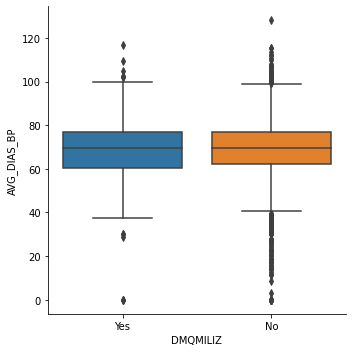

In [12]:
sns.catplot(x='DMQMILIZ', y='AVG_DIAS_BP',kind='box',data=test_df)

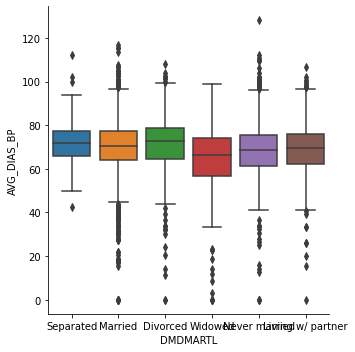

In [13]:
sns.catplot(x='DMDMARTL', y='AVG_DIAS_BP',kind='box', data=test_df)

<AxesSubplot:xlabel='LBXHCT', ylabel='High_DIAS_BP'>

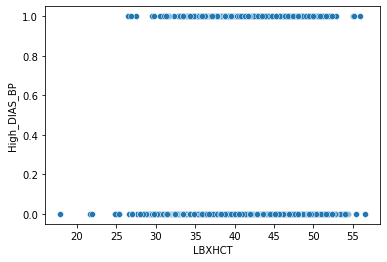

In [14]:
sns.scatterplot(x='LBXHCT', y='High_DIAS_BP',data=test_df)

<AxesSubplot:xlabel='LBXHCT', ylabel='High_SYS_BP'>

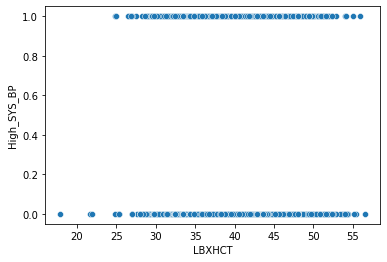

In [15]:
sns.scatterplot(x='LBXHCT', y='High_SYS_BP',data=test_df)

In [16]:
xy_values = test_df[test_df['LBXHCT']>-1]
xy_values = xy_values[xy_values['High_SYS_BP']>-1].sort_values(by='LBXHCT')
x_values = xy_values['LBXHCT'].to_numpy().reshape(-1,1)
y_values = xy_values['High_SYS_BP'].to_numpy().astype('int')

model = lm.LogisticRegression()
results = model.fit(X=x_values,y=y_values)

#print(results.summary())

In [17]:
xy_values = test_df[test_df['LBXHCT']>-1]
xy_values = xy_values[xy_values['High_SYS_BP']>-1].sort_values(by='LBXHCT')
x_values = xy_values['LBXHCT'].to_numpy().reshape(-1,1)
y_values = xy_values['High_SYS_BP'].to_numpy().astype('int')

#xy_values.head()
print(type(y_values))

model = lm.LogisticRegression()
results = model.fit(X=x_values,y=y_values)

y_hat_probs = model.predict_proba(x_values)[:,1]
threshold = 0.15
y_hat = (y_hat_probs >= threshold).astype('int')
#print(results.summary())


<class 'numpy.ndarray'>


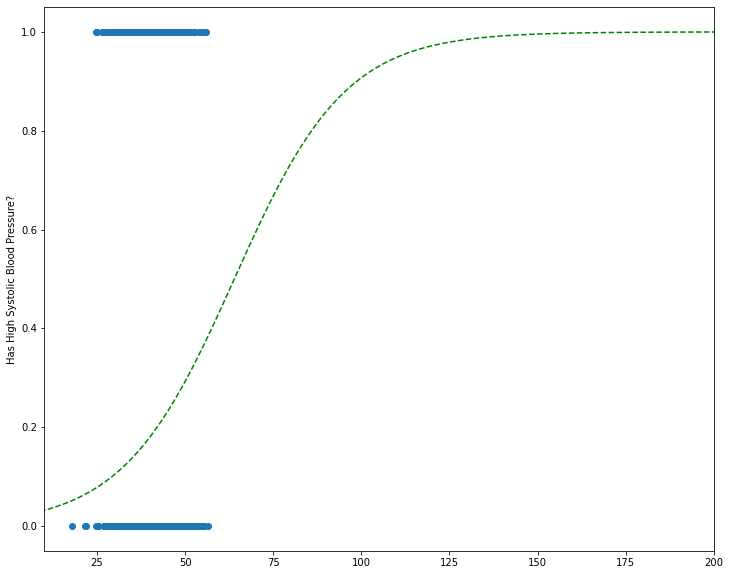

In [18]:
x = np.linspace(0,500,500).reshape(-1,1)

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.scatter(x_values, y_values, cmap='bwr')
ax.plot(x, model.predict_proba(x)[:,1], 'g--', label='probability of horse')
ax.set_xlim([10,200])
# ax.set_ylim([-0.2,1.201])
# ax.set_xlabel('Weight (lb)',fontsize=font_size)
ax.set_ylabel('Has High Systolic Blood Pressure?')
# ax.set_title('Horseness vs. weight',fontsize=font_size)
plt.show()

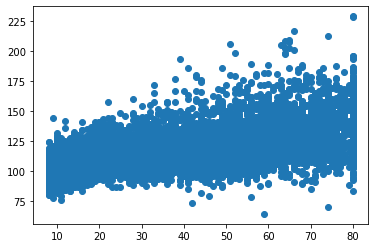

In [19]:
fig, ax = plt.subplots()

x = test_df['RIDAGEYR']
y = test_df['AVG_SYS_BP']

ax.scatter(x=x,y=y)

In [22]:
xy_values = test_df[test_df['LBXHCT']>-1]
xy_values = xy_values[xy_values['High_SYS_BP']>-1].sort_values(by='LBXHCT')
x = xy_values['LBXHCT']
y = xy_values['High_SYS_BP']
formula = "High_SYS_BP ~ LBXHCT"
mylogit = smf.logit(formula=formula, data=test_df).fit()
yhat = mylogit.predict(x)
prediction = list(map(round, yhat))
print('Test accuracy = ', accuracy_score(y, prediction))
#mylogit.summary()

Optimization terminated successfully.
         Current function value: 0.477647
         Iterations 6
Test accuracy =  0.8123829588014981


In [20]:
formula2 = "High_SYS_BP ~ LBXHCT + RIDAGEYR"
mylogit2 = smf.logit(formula=formula2, data=test_df).fit()
mylogit2.summary()

Optimization terminated successfully.
         Current function value: 0.357891
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            High_SYS_BP   No. Observations:                 8544
Model:                          Logit   Df Residuals:                     8541
Method:                           MLE   Df Model:                            2
Date:                Wed, 29 Dec 2021   Pseudo R-squ.:                  0.2586
Time:                        19:05:15   Log-Likelihood:                -3057.8
converged:                       True   LL-Null:                       -4124.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.8462      0.341    -17.121      0.000      -6.515      -5.177
LBXHCT         0.0384      0.008      4.910      0.000       0.023       0.054
RIDAGEYR       0.0629      0.002     37.328      0.000       0.060       0.066
==============================================================================
"""

In [21]:
formula3 = "High_SYS_BP ~ LBXHCT + RIDAGEYR + RIAGENDR"
mylogit3 = smf.logit(formula=formula3, data=test_df).fit()
mylogit3.summary()

Optimization terminated successfully.
         Current function value: 0.357337
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            High_SYS_BP   No. Observations:                 8544
Model:                          Logit   Df Residuals:                     8540
Method:                           MLE   Df Model:                            3
Date:                Wed, 29 Dec 2021   Pseudo R-squ.:                  0.2598
Time:                        19:05:19   Log-Likelihood:                -3053.1
converged:                       True   LL-Null:                       -4124.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -5.4770      0.360    -15.201      0.000      -6.183      -4.771
RIAGENDR[T.Male]     0.2212      0.072      3.074      0.002       0.080       0.362
LBXHCT               0.0266      0.009      3.056      0.002       0.010       0.044
RIDAGEYR             0.0630      0.002     37.491      0.000       0.060       0.066
====================================================================================
"""

In [22]:
formula4 = "High_SYS_BP ~ LBXHCT + RIAGENDR"
mylogit4 = smf.logit(formula=formula4, data=test_df).fit()
mylogit4.summary()

Optimization terminated successfully.
         Current function value: 0.477605
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            High_SYS_BP   No. Observations:                 8544
Model:                          Logit   Df Residuals:                     8541
Method:                           MLE   Df Model:                            2
Date:                Wed, 29 Dec 2021   Pseudo R-squ.:                 0.01066
Time:                        19:08:49   Log-Likelihood:                -4080.7
converged:                       True   LL-Null:                       -4124.6
Covariance Type:            nonrobust   LLR p-value:                 8.173e-20
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -4.1271      0.298    -13.829      0.000      -4.712      -3.542
RIAGENDR[T.Male]    -0.0520      0.061     -0.846      0.397      -0.172       0.068
LBXHCT               0.0659      0.008      8.766      0.000       0.051       0.081
====================================================================================
"""

In [105]:
formula5 = "High_SYS_BP ~ LBXHCT + DMQMILIZ"
mylogit5 = smf.logit(formula=formula5, data=test_df).fit()
mylogit5.summary()

Optimization terminated successfully.
         Current function value: 0.582704
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            High_SYS_BP   No. Observations:                 5824
Model:                          Logit   Df Residuals:                     5821
Method:                           MLE   Df Model:                            2
Date:                Tue, 28 Dec 2021   Pseudo R-squ.:                0.006866
Time:                        19:59:12   Log-Likelihood:                -3393.7
converged:                       True   LL-Null:                       -3417.1
Covariance Type:            nonrobust   LLR p-value:                 6.476e-11
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.6829      0.295     -2.311      0.021      -1.262      -0.104
DMQMILIZ[T.Yes]     0.6682      0.096      6.973      0.000       0.480       0.856
LBXHCT             -0.0087      0.007     -1.219      0.223      -0.023       0.005
===================================================================================
"""

In [23]:
formula6 = "High_SYS_BP ~ DMQMILIZ"
mylogit6 = smf.logit(formula=formula6, data=test_df).fit()
mylogit6.summary()

Optimization terminated successfully.
         Current function value: 0.584037
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            High_SYS_BP   No. Observations:                 6065
Model:                          Logit   Df Residuals:                     6063
Method:                           MLE   Df Model:                            1
Date:                Wed, 29 Dec 2021   Pseudo R-squ.:                0.006247
Time:                        19:09:14   Log-Likelihood:                -3542.2
converged:                       True   LL-Null:                       -3564.5
Covariance Type:            nonrobust   LLR p-value:                 2.496e-11
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.0337      0.031    -33.854      0.000      -1.094      -0.974
DMQMILIZ[T.Yes]     0.6426      0.094      6.820      0.000       0.458       0.827
===================================================================================
"""

In [99]:
xy_values = test_df[test_df['LBXHCT']>-1]
xy_values = xy_values[xy_values['High_SYS_BP']>-1].sort_values(by='LBXHCT')
x_values = xy_values['LBXHCT'].to_numpy().reshape(-1,1)
y_values = xy_values['High_SYS_BP'].to_numpy()
mylogit3 = sma.Logit(y_values,x_values).fit()

Optimization terminated successfully.
         Current function value: 0.490207
         Iterations 5
